## This notebook will be doing some EDA on the canonical Titanic DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
titanic= pd.read_csv("./train.csv")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


<BarContainer object of 12 artists>

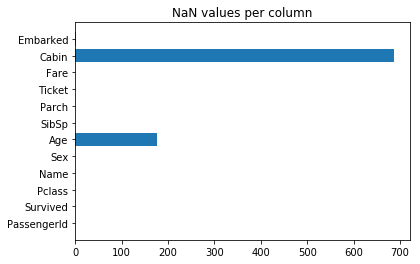

In [4]:
# Look at null values
plt.title('NaN values per column')
plt.barh(titanic.columns, titanic.isna().sum())

### The "Cabin" column has the most empty/NaN values

In [5]:
#remove rows in which Embarked is na
titanic= titanic[pd.isna(titanic['Embarked']) != True]

In [6]:
titanic['Cabin']=titanic['Cabin'].fillna('¯\(ツ)/¯')

### 3.1 Determining Family Size

In [7]:
titanic['FamilyCount']= titanic['SibSp']+titanic['Parch']

### 3.2 Determining Reverend Status

In [8]:
titanic['IsReverend']=titanic['Name'].str.contains('Rev.').apply(lambda x: int(x))

### 3.3 using pd.get_dummies to get classification on categories

In [9]:
embarked_dummies=pd.get_dummies(titanic['Embarked'], prefix='Embarked_')
sex_dummies = pd.get_dummies(titanic['Sex']);

In [10]:
titanic=pd.concat([titanic,embarked_dummies], axis=1)
titanic=pd.concat([titanic, sex_dummies], axis=1)

### Create some dummy variables (or one hot encoded variables) to look at the categorical data more closely ###

In [11]:
import re

def title_extractor(name):
    try:
        ex_search=re.search('(\,)(\s)((\w+)(\.))', name) # looking for comma,space,string,period
        return ''.join(g for g in ex_search.group(4,5)) # joining the string,period into one
    except:
        return None
names=titanic['Name'].map(title_extractor)
names.name='Title'
titanic= pd.concat([titanic, names], axis=1)

In [12]:
titles=pd.get_dummies(titanic['Title'])
titanic=pd.concat([titanic, titles], axis=1)

In [13]:
pd.options.display.max_columns=None
titanic
# display(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,female,male,Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,Mrs.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0,Miss.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,Mrs.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,0,0,1,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0,0,0,1,0,1,Master.,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,0,0,0,1,1,0,Mrs.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,0,1,0,0,1,0,Mrs.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
titanic.loc[titanic.Title=='Jonkheer.',:]
# Wow, I guess Jonkheer is a real title

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,female,male,Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,¯\(ツ)/¯,S,0,0,0,0,1,0,1,Jonkheer.,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Step 4: Exploratory Analysis

In [15]:
# Overall Survival Rate?
survival_rate=sum(titanic["Survived"])/len(titanic) # =0.38245219347581555
print(sum(titanic['Survived']))

340


In [16]:
#Survival by gender
for gender in ['female', 'male']:
    curr_surv= titanic.loc[titanic[gender]==1,"Survived"]
    print(f"{gender.capitalize()} survival rate: {round(100*sum(curr_surv)/len(curr_surv),2)}%")
# hashtag chivalry

Female survival rate: 74.04%
Male survival rate: 18.89%


In [17]:
# Class Survival Rates
for c in set(titanic['Pclass']):
    curr_surv= titanic.loc[titanic['Pclass']==c ,"Survived"]
    print(len(curr_surv), "passengers in class", c)
    print(f"Survival rate for Passenger Class {c}: {round(100*sum(curr_surv)/len(curr_surv),2)}%")

214 passengers in class 1
Survival rate for Passenger Class 1: 62.62%
184 passengers in class 2
Survival rate for Passenger Class 2: 47.28%
491 passengers in class 3
Survival rate for Passenger Class 3: 24.24%


In [18]:
# Reverned Survival
rev_surv= titanic.loc[titanic['IsReverend']==1, "Survived"]
print(f"Out of {len(rev_surv)} Reverends, {sum(rev_surv)} survived. :(")
# hashtag why hast thou forsaken me

Out of 6 Reverends, 0 survived. :(


In [19]:
titanic[titanic['IsReverend']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,female,male,Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1,0,0,1,0,1,Rev.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1,0,0,1,0,1,Rev.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1,0,0,1,0,1,Rev.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1,0,1,0,0,1,Rev.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1,0,0,1,0,1,Rev.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1,0,0,1,0,1,Rev.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
shruggie_cabs= titanic.loc[titanic['Cabin']=='¯\(ツ)/¯', "Survived"]
print(f"Shruggie Cabs survived with a rate of {round(100*sum(shruggie_cabs)/len(shruggie_cabs),2)}%...  ¯\(ツ)/¯")
# hashtag  ¯\(ツ)/¯

Shruggie Cabs survived with a rate of 29.99%...  ¯\(ツ)/¯


In [112]:
age_unknown= titanic.loc[np.isnan(titanic['Age']), "Survived"]
print(f"Passengers with unknown ages had a survival rate of {round(100*sum(age_unknown)/len(age_unknown),2)}%")

Passengers with unknown ages had a survival rate of 29.38%


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,female,male,Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,CatAge
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,0,0,1,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,¯\(ツ)/¯,S,0,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,¯\(ツ)/¯,C,0,0,1,0,0,1,0,Mrs.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,¯\(ツ)/¯,C,0,0,1,0,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,¯\(ツ)/¯,Q,0,0,0,1,0,1,0,Miss.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,¯\(ツ)/¯,S,0,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,0,1,0,0,1,0,Mrs.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,¯\(ツ)/¯,Q,0,0,0,1,0,1,0,Miss.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,¯\(ツ)/¯,C,0,0,1,0,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,¯\(ツ)/¯,C,0,0,1,0,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN


In [22]:
len(titanic.loc[np.isnan(titanic['Age'])])

177

In [23]:
portdict={
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S": "Southampton"
         }
for port in ['C', 'Q', 'S']:
    port_surv=titanic.loc[titanic["Embarked__"+port] ==1, "Survived"];
    print(f"Passengers who embarked from {portdict[port]} had a survival rate of {round(100*sum(port_surv)/len(port_surv),2)}%")


Passengers who embarked from Cherbourg had a survival rate of 55.36%
Passengers who embarked from Queenstown had a survival rate of 38.96%
Passengers who embarked from Southampton had a survival rate of 33.7%


### Note* let's look at ratio of Passenger classes from each port

In [24]:
children=titanic[titanic['Age']<12];

In [25]:
# children.groupby(['Pclass','Survived']).count()

In [26]:
for pclass in titanic['Pclass'].unique():
    surv_col= titanic.query("Age < 12 and Pclass == @pclass")["Survived"]
    print(f"Children of class {pclass} had a survival rate of {round(sum(surv_col)/len(surv_col)*100,2)}% (out of {len(surv_col)})")

Children of class 3 had a survival rate of 40.43% (out of 47)
Children of class 1 had a survival rate of 75.0% (out of 4)
Children of class 2 had a survival rate of 100.0% (out of 17)


In [27]:
titanic[titanic['Capt.']==1]
#Captain Edward Gifford Crosby did not survive. As is proper with a captain and a ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,female,male,Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1,Capt.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
died=titanic[titanic['Survived']==0]
died.sort_values('Fare', ascending=False)

# Mr. Mark and Charles Alexander Fortune perished after spending $263.00

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,female,male,Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,0,1,0,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,C,0,0,1,0,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,2,0,1,0,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,1,0,0,0,1,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,3,0,0,0,1,1,0,Mrs.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,3,0,0,0,1,1,0,Miss.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,¯\(ツ)/¯,C,0,0,1,0,0,0,1,Mr.,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
have_fam= titanic.query('SibSp > 0 or Parch > 0')['Survived']
print(f"people with family survived at a rate of {round(100*sum(have_fam)/len(have_fam),2)}% (out of {len(have_fam)})")
singletons= titanic.query('SibSp == 0 and Parch == 0')['Survived']
print(f"people without family survived at a rate of {round(100*sum(singletons)/len(singletons),2)}% (out of {len(singletons)})")

people with family survived at a rate of 50.56% (out of 354)
people without family survived at a rate of 30.09% (out of 535)


### Plotting

**First Let's look at How survival rates correlated with title**

<BarContainer object of 16 artists>

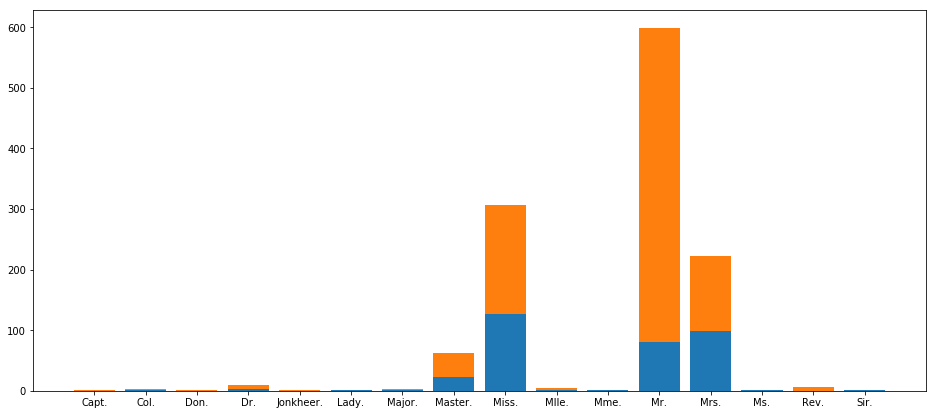

In [30]:
surv_title= titanic[['Title','Survived']].groupby('Title').sum()
count_title=titanic[['Title','Survived']].groupby('Title').count()
fig=plt.figure(figsize=(16,7))
ax=plt.gca()
ax.bar(surv_title.index, surv_title['Survived'])
ax.bar(surv_title.index, count_title['Survived'], bottom=surv_title.Survived)

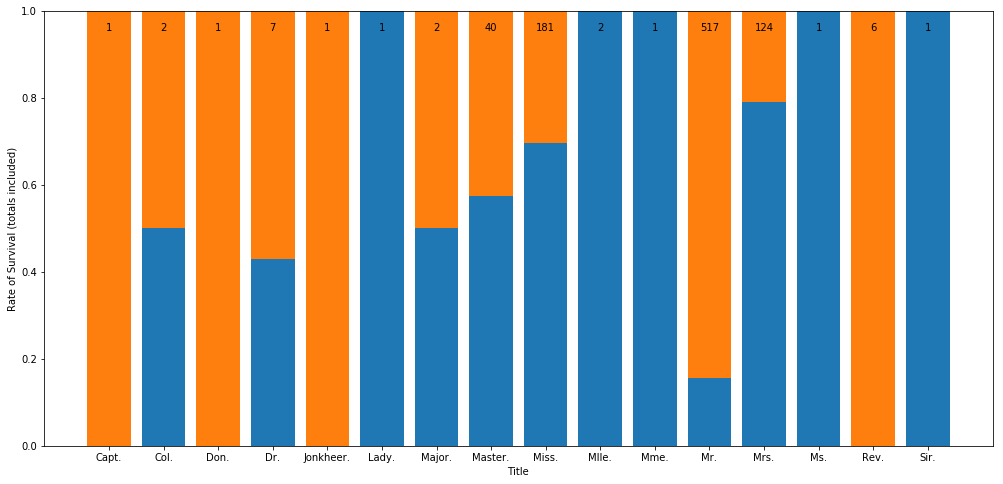

In [94]:
#Ok, that was kinda intersting but the axes is a problem. Gonna try a percentage stacked bar. 
surv_rate=surv_title.Survived/count_title.Survived
ones=np.linspace(1,1,len(surv_rate))
fig= plt.figure(figsize=(17,8));
ax=plt.gca();
ax.set_ylabel('Rate of Survival (totals included)')
ax.set_xlabel('Title')
ax.bar(surv_title.index, surv_rate)
ax.bar(surv_title.index, ones-surv_rate, bottom=surv_rate)
for rect, label in zip(ax.patches, count_title['Survived']):
#     print(rect.get_height()) #fig.get_size_inches()[1]*fig.dpi# 
    ax.text(rect.get_x() + rect.get_width() / 2, .95, label,
            ha='center', va='bottom')

### I want to look at Pclass and Gender

In [32]:
test_sex_class=titanic.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()
test_sex_class
#aborted this path because it wasn't clear how I could easily plot it

Sex     Pclass  Survived
female  1       0             3
                1            89
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

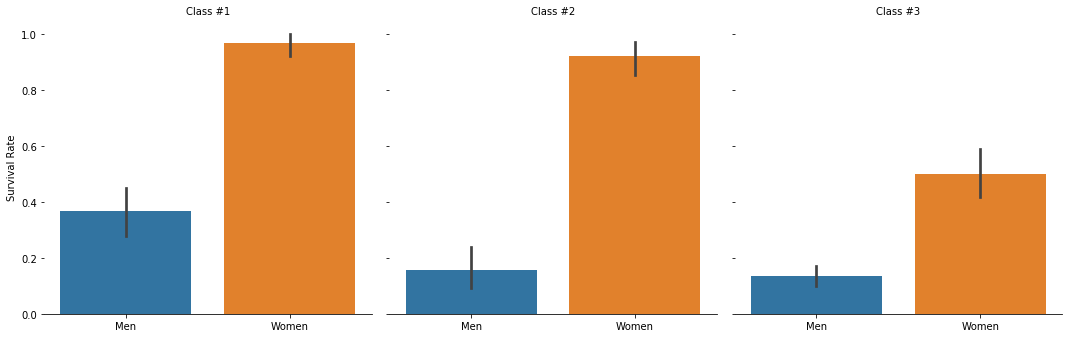

In [33]:
#Thanks to https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
g=sns.catplot(x='Sex', y='Survived', col='Pclass', data=titanic, kind='bar')
(g.set_axis_labels('','Survival Rate')
 .set_xticklabels(['Men','Women'])
 .set_titles("Class #{col_name}")
 .despine(left=True)
)

### I want to create a plot looking at ticket price and survival

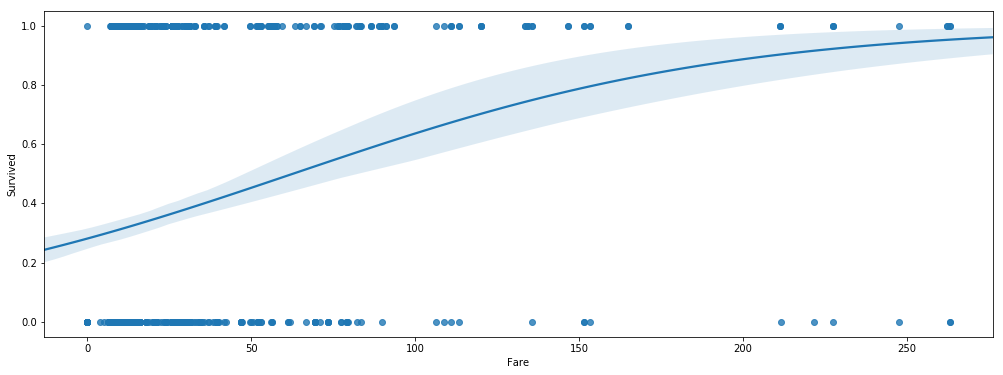

In [42]:

import statsmodels
plt.figure(figsize=(17, 6))
sns.regplot('Fare', 'Survived', data=titanic[titanic['Fare']<300], logistic=True, n_boot=100) #remove the outlier $600 ticket, which survived (obviously)


### Pretty intersting stuff. Now... I am curious as to the economic classes of the different ports:

In [50]:
titanic.groupby(['Embarked', 'Pclass'])['Pclass'].count()
tg=titanic.groupby(['Pclass','Embarked'])['Embarked'].count()

In [64]:
tg.index.levels[0]

FrozenList([[1, 2, 3], ['C', 'Q', 'S']])

In [ ]:
surv_rate=surv_title.Survived/count_title.Survived
ones=np.linspace(1,1,len(surv_rate))
fig= plt.figure(figsize=(17,8));
ax=plt.gca();
ax.set_ylabel('Rate of Survival (totals included)')
ax.set_xlabel('Title')
ax.bar(surv_title.index, surv_rate)
ax.bar(surv_title.index, ones-surv_rate, bottom=surv_rate)
for rect, label in zip(ax.patches, count_title['Survived']):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

In [73]:
tg

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Embarked, dtype: int64

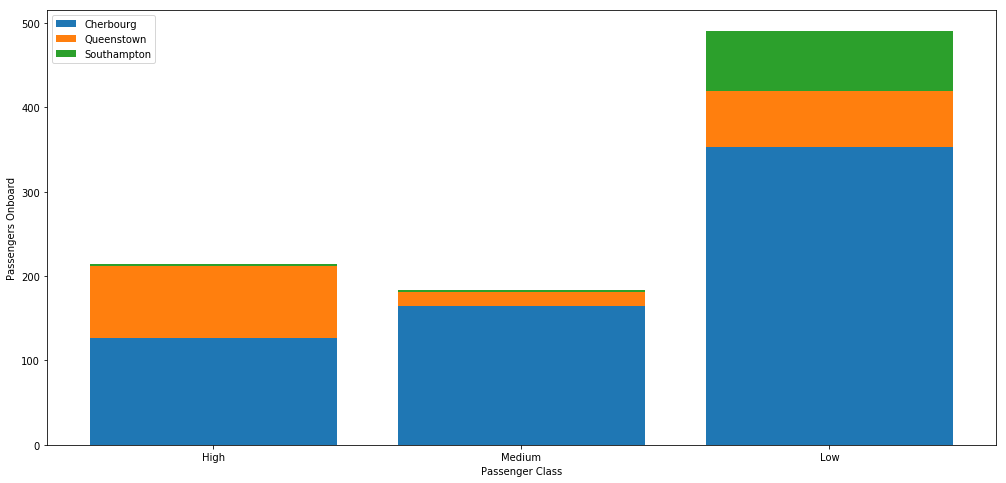

In [78]:

fig= plt.figure(figsize=(17,8))
cherbourg= tg[:,'C']
queenstown=tg[:,'Q']
southampton=tg[:,'S']
ax=plt.gca();
ax.set_ylabel('Passengers Onboard')
ax.set_xlabel('Passenger Class')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['High', 'Medium', 'Low'])
ax.bar(tg.index.levels[0], southampton)
ax.bar(tg.index.levels[0], cherbourg, bottom=southampton)
ax.bar(tg.index.levels[0], queenstown, bottom=cherbourg+southampton)
ax.legend(['Cherbourg','Queenstown','Southampton'])

### Ok, Finally I'd like to look at age in relation to survival.
#### Specifically, whether the unknown ages were statistically different than the known (perhaps cluing us in as to their age profile). Also, were children saved more?

<BarContainer object of 8 artists>

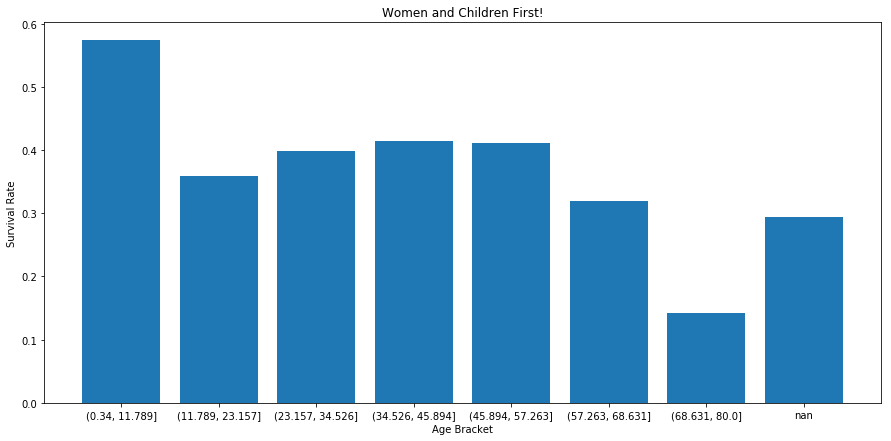

In [118]:
titanic['CatAge']=pd.cut(titanic['Age'],7)
cat_ages=titanic[['Survived']].groupby(titanic['CatAge'].astype(str)).mean()
# print(f"Mean overall survival was {titanic.Survived.mean()}")
plt.figure(figsize=(15,7))
plt.title('Women and Children First!')
plt.xlabel('Age Bracket')
plt.ylabel('Survival Rate')
plt.bar(cat_ages.index, cat_ages.Survived)